In [2]:
import pandas as pd
import seaborn as sea
import statistics as sta

In [6]:
dataset = pd.read_csv('tempo.csv', delimiter=';', encoding='utf-8')

In [13]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85,85.0,FALSO,nao
1,sol,80,90.0,VERDADEIRO,nao
2,nublado,83,86.0,FALSO,sim
3,chuva,70,NaN,FALSO,sim
4,chuva,68,80.0,FALSO,sim


In [8]:
dataset.shape

(14, 5)

In [16]:
dataset.groupby([dataset['Aparencia']]).size()

Aparencia
chuva      5
nublado    3
sol        6
dtype: int64

In [15]:
dataset.loc[dataset['Aparencia'].isin(['menos']), 'Aparencia'] = 'sol'

In [17]:
dataset['Temperatura'].describe()

count      14.000000
mean      155.571429
std       306.433759
min        64.000000
25%        69.250000
50%        73.500000
75%        80.750000
max      1220.000000
Name: Temperatura, dtype: float64

AxesSubplot(0.125,0.11;0.775x0.77)


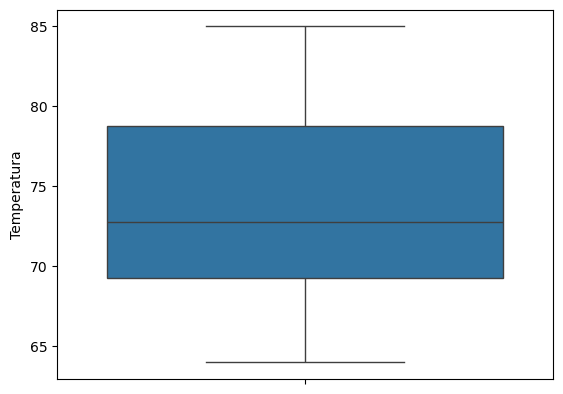

In [26]:
print(sea.boxplot(dataset['Temperatura']))

In [19]:
mediana = sta.median(dataset['Temperatura'])
mediana

73.5

In [25]:
dataset.loc[dataset['Temperatura'] < -130, 'Temperatura'] = mediana
dataset.loc[dataset['Temperatura'] > 130, 'Temperatura'] = mediana

In [29]:
mediana_umidade = sta.median(dataset['Umidade'])
mediana

73.5

In [30]:
dataset.loc[(dataset['Umidade'] < 0.0 ) | (dataset['Umidade'] > 100.0), 'Umidade'] = mediana_umidade

AxesSubplot(0.125,0.11;0.775x0.77)


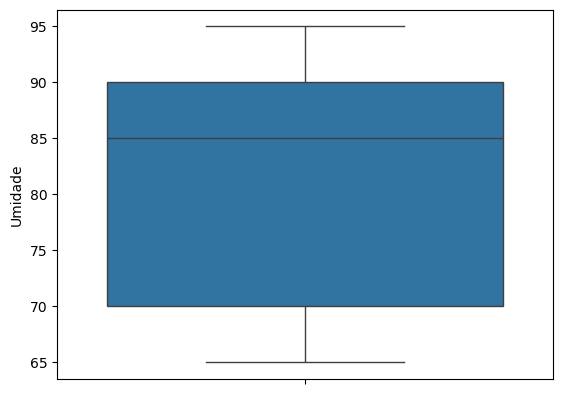

In [31]:
print(sea.boxplot(dataset['Umidade']))

In [32]:
dataset.groupby(dataset['Jogar']).size()

Jogar
nao    5
sim    9
dtype: int64

In [39]:
dataset.isnull().sum()

Aparencia      0
Temperatura    0
Umidade        0
Vento          0
Jogar          0
dtype: int64

In [34]:
dataset['Umidade'].fillna(mediana_umidade, inplace=True)

In [37]:
dataset.groupby(dataset['Vento']).size()

Vento
FALSO         7
VERDADEIRO    6
dtype: int64

In [38]:
dataset.fillna('FALSO', inplace=True)

In [40]:
dataset.head()

,Aparencia,Temperatura,Umidade,Vento,Jogar
0,sol,85.0,85.0,FALSO,nao
1,sol,80.0,90.0,VERDADEIRO,nao
2,nublado,83.0,86.0,FALSO,sim
3,chuva,70.0,85.5,FALSO,sim
4,chuva,68.0,80.0,FALSO,sim


In [41]:
dataset.shape

(14, 5)